# Modeling

Getting the Data

In [1]:
import matplotlib.pyplot  as plt
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#from google.colab import files
#uploaded = files.upload()
#import io
#data = pd.read_csv(io.StringIO(uploaded['full_data.csv'].decode('utf-8')))

data = pd.read_csv (r'full_data.csv')
data['allsqft']=data['TotalBsmtSF']+data['2ndFlrSF']+data['OpenPorchSF']+data['GrLivArea']+data['MasVnrArea']+data['LotArea']
data['Q_times_allsqft']=data['allsqft']*data['OverallQual']

print (data)


        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1335  1455          20     7500            7            5       2004   
1336  1456          60     7917            6            5       1999   
1337  1457          20    13175            6            6       1978   
1338  1459          20     9717            5            6       1950   
1339  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfSF  ...  BsmtExposure  \
0             2003         196         706        150  ... 

(array([  1.,   7.,  44., 134., 384., 381., 229., 115.,  38.,   7.]),
 array([10.54273278, 10.82085236, 11.09897194, 11.37709152, 11.6552111 ,
        11.93333068, 12.21145026, 12.48956984, 12.76768942, 13.045809  ,
        13.32392858]),
 <BarContainer object of 10 artists>)

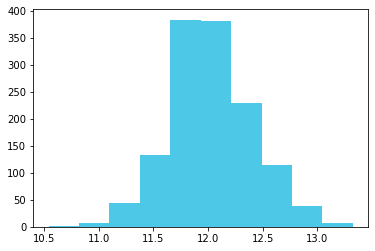

In [2]:
y_log = np.log1p(data['SalePrice'])
data['SalePrice'] = y_log
plt.hist(data['SalePrice'], color='#4DC9E7')

In [3]:
categorical = sorted(["MSZoning","LotFrontage","LotShape","LotConfig","Neighborhood","HouseStyle","RoofStyle","Exterior1st","Exterior2nd","MasVnrType","ExterQual","Foundation","BsmtQual","BsmtExposure","BsmtFinType1","HeatingQC","KitchenQual","FireplaceQu","GarageType","GarageFinish"])
data[categorical] = data[categorical].astype('category')
df = pd.get_dummies(data,columns=categorical)
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip
0,1,60,8450,7,5,2003,2003,196,706,150,...,0,0,0,0,0,0,0,1,0,0
1,2,20,9600,6,8,1976,1976,0,978,284,...,0,0,0,0,0,1,0,1,0,0
2,3,60,11250,7,5,2001,2002,162,486,434,...,0,0,0,0,0,0,0,1,0,0
3,4,70,9550,7,5,1915,1970,0,216,540,...,0,0,0,0,0,0,0,1,0,0
4,5,60,14260,8,5,2000,2000,350,655,490,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1455,20,7500,7,5,2004,2005,0,410,811,...,0,0,1,0,0,0,0,1,0,0
1336,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,0,0,0,1,0,0
1337,1457,20,13175,6,6,1978,1988,119,790,589,...,0,0,0,0,0,0,0,1,0,0
1338,1459,20,9717,5,6,1950,1996,0,49,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = MinMaxScaler()
scaler =StandardScaler()
scaler.fit(df)
def scale(data):
    for col in data:
            data[col] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data[col])),columns=[col])
    return data
df=df.dropna()
df

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip
0,1,60,8450,7,5,2003,2003,196,706,150,...,0,0,0,0,0,0,0,1,0,0
1,2,20,9600,6,8,1976,1976,0,978,284,...,0,0,0,0,0,1,0,1,0,0
2,3,60,11250,7,5,2001,2002,162,486,434,...,0,0,0,0,0,0,0,1,0,0
3,4,70,9550,7,5,1915,1970,0,216,540,...,0,0,0,0,0,0,0,1,0,0
4,5,60,14260,8,5,2000,2000,350,655,490,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1455,20,7500,7,5,2004,2005,0,410,811,...,0,0,1,0,0,0,0,1,0,0
1336,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,0,0,0,0,1,0,0
1337,1457,20,13175,6,6,1978,1988,119,790,589,...,0,0,0,0,0,0,0,1,0,0
1338,1459,20,9717,5,6,1950,1996,0,49,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
## train, test = train_test_split(df, test_size=0.2)
train=df.head(1072)
print(train.shape)
test=df.tail(268)
y_train=train['SalePrice']
x_train=train.drop(['SalePrice','Id'], axis=1)
y_test=test['SalePrice']
x_test=test.drop(['SalePrice','Id'], axis=1)
print(x_test)
x_train.reset_index(drop=True, inplace=True) 
x_test.reset_index(drop=True, inplace=True) 
x_train=scale(x_train)
x_test=scale(x_test)
x_train.reset_index(drop=True, inplace=True) 
x_test.reset_index(drop=True, inplace=True) 
print(x_train.shape)
print(x_test.shape)
#x_train=x_train.dropna()
#x_train
x_train

(1072, 247)
      MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1072         120     5001            7            5       2007          2008   
1073          20    11932            8            5       2007          2008   
1074          60     9120            6            6       1974          1974   
1075          20    14778            6            7       1954          2006   
1076          20     8724            5            5       1968          1968   
...          ...      ...          ...          ...        ...           ...   
1335          20     7500            7            5       2004          2005   
1336          60     7917            6            5       1999          2000   
1337          20    13175            6            6       1978          1988   
1338          20     9717            5            6       1950          1996   
1339          20     9937            5            6       1965          1965   

      MasVnrArea  BsmtFinSF

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip
0,0.107716,-0.223600,0.650128,-0.540254,1.034655,0.850720,0.498145,0.607108,-0.945544,-0.495865,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
1,-0.853544,-0.070583,-0.100882,2.235235,0.108219,-0.470198,-0.589048,1.240794,-0.641998,0.502638,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,11.532563,-0.097037,0.502331,-0.075023,-0.478913
2,0.107716,0.148962,0.650128,-0.540254,0.966030,0.801797,0.309550,0.094567,-0.302207,-0.338466,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
3,0.348031,-0.077236,0.650128,-0.540254,-1.984841,-0.763736,-0.589048,-0.534460,-0.062088,-0.741802,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
4,0.107716,0.549466,1.401138,-0.540254,0.931718,0.703951,1.352369,0.488291,-0.175352,0.214892,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,-0.853544,1.014503,-0.851892,-1.465417,-0.475093,-1.301888,0.143143,-0.627649,1.636867,1.004349,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
1068,-0.613229,-0.564228,-0.100882,2.235235,-1.470154,1.046412,-0.589048,0.215713,-0.655589,-0.594240,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
1069,0.107716,0.474954,0.650128,0.384909,-0.269218,0.116876,1.008460,0.020016,-0.356573,-0.476191,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
1070,-0.853544,0.084828,-0.851892,2.235235,0.108219,0.899643,-0.589048,1.657816,-0.651059,0.933027,...,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,11.532563,-0.097037,0.502331,-0.075023,-0.478913


We will create an ensemble of Models and will predict based on the average of all Models

# ElasticNet

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error
reg3=ElasticNet(alpha=0.001, l1_ratio=0.32, max_iter=100000).fit(x_train, y_train)
y_test_pred_ElasticNet=reg3.predict(x_test)
y_train_pred_ElasticNet=reg3.predict(x_train)
mse_train_ElasticNet=mean_squared_error(y_train, y_train_pred_ElasticNet)
mse_test_ElasticNet=mean_squared_error(y_test, y_test_pred_ElasticNet)
print("MSE Train : ",mse_train_ElasticNet)
print("MSE Test : ",mse_test_ElasticNet)

MSE Train :  0.008463416631863901
MSE Test :  0.013942534001477979


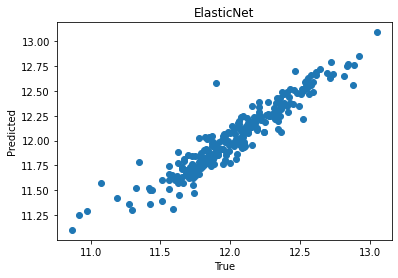

In [ ]:
plt.scatter(y_test,y_test_pred_ElasticNet );
plt.title("ElasticNet")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();

In [ ]:
"""
clf = ElasticNet(max_iter=100000)
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=clf, param_grid = {"alpha": np.arange(0.001,1,0.005),"l1_ratio":np.arange(0,1,0.01)}, cv = 3, n_jobs=-1,verbose=3)
grid.fit(x_train, y_train)
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)
"""

'\nclf = ElasticNet(max_iter=100000)\nfrom sklearn.model_selection import GridSearchCV\ngrid=GridSearchCV(estimator=clf, param_grid = {"alpha": np.arange(0.001,1,0.005),"l1_ratio":np.arange(0,1,0.01)}, cv = 3, n_jobs=-1,verbose=3)\ngrid.fit(x_train, y_train)\nprint(grid.best_estimator_)\nprint(grid.best_params_)\nprint(grid.best_score_)\n'

# RandomForestRegressor

MSE Train :  0.002310425857225929
MSE Test :  0.02093322831825733


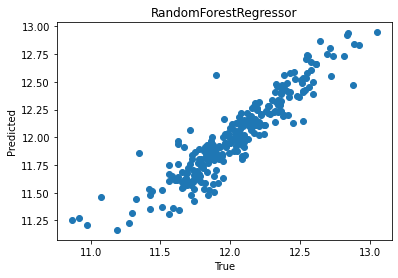

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_features='auto', n_estimators=200, n_jobs=-1)
rf.fit(x_train, y_train)
y_test_pred_rf=rf.predict(x_test)
y_train_pred_rf=rf.predict(x_train)
mse_train_rf=mean_squared_error(y_train, y_train_pred_rf)
mse_test_rf=mean_squared_error(y_test, y_test_pred_rf)
print("MSE Train : ",mse_train_rf)
print("MSE Test : ",mse_test_rf)
plt.scatter(y_test,y_test_pred_rf );
plt.title("RandomForestRegressor")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();


# SGDRegressor

MSE Train :  0.008465766774607393
MSE Test :  0.014671177859411402


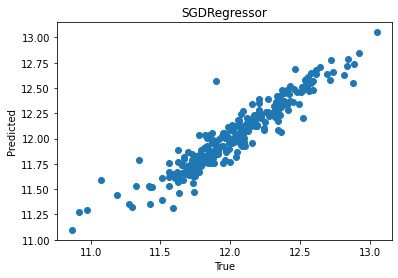

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=10000, tol=1e-20,n_iter_no_change=200))
reg.fit(x_train, y_train)
y_test_pred_SGDRegressor=reg.predict(x_test)
y_train_pred_SGDRegressor=reg.predict(x_train)
mse_train_SGDRegressor=mean_squared_error(y_train, y_train_pred_SGDRegressor)
mse_test_SGDRegressor=mean_squared_error(y_test, y_test_pred_SGDRegressor)
print("MSE Train : ",mse_train_SGDRegressor)
print("MSE Test : ",mse_test_SGDRegressor)
plt.scatter(y_test,y_test_pred_SGDRegressor );
plt.title("SGDRegressor")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();

# KNeighborsRegressor

MSE Train :  0.030014639815308348
MSE Test :  0.034118754087964026


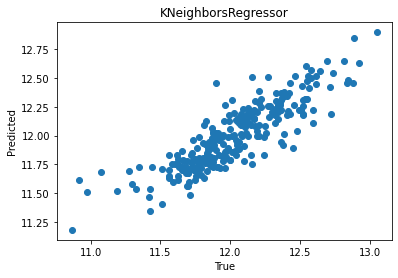

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
"""
neigh = KNeighborsRegressor()
gridneigh=GridSearchCV(estimator=neigh, param_grid = {"n_neighbors": np.arange(1,800,2)}, cv = 3, n_jobs=-1,verbose=3)
gridneigh.fit(x_train, y_train)
print(gridneigh.best_estimator_)
print(gridneigh.best_params_)
print(gridneigh.best_score_)
"""
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)
y_test_pred_neigh=neigh.predict(x_test)
y_train_pred_neigh=neigh.predict(x_train)
mse_train_neigh=mean_squared_error(y_train, y_train_pred_neigh)
mse_test_neigh=mean_squared_error(y_test, y_test_pred_neigh)
print("MSE Train : ",mse_train_neigh)
print("MSE Test : ",mse_test_neigh)
plt.scatter(y_test,y_test_pred_neigh );
plt.title("KNeighborsRegressor")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();


# MLPRegressor (NN)

Iteration 1, loss = 47.25827169
Iteration 2, loss = 19.28408071
Iteration 3, loss = 16.10724497
Iteration 4, loss = 14.13143327
Iteration 5, loss = 12.48743406
Iteration 6, loss = 11.01594158
Iteration 7, loss = 9.69764927
Iteration 8, loss = 8.52907685
Iteration 9, loss = 7.53435965
Iteration 10, loss = 6.61813761
Iteration 11, loss = 5.78995292


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


0.07262662370516942
0.21789753222971708


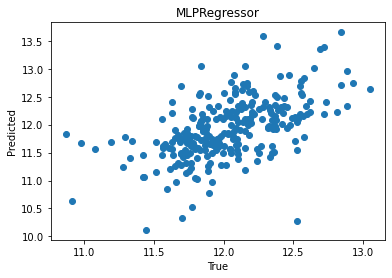

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
"""
#param_grid = {'hidden_layer_sizes':[(300,300),(300,300,300),(1000,1000),(1000),(2000,2000,2000)],'alpha': np.logspace(-3,1,4),'activation':('tanh')}
param_grid = {'hidden_layer_sizes':[(256,256,256)],'alpha': np.linspace(0.0,50,40),'batch_size':[20]}

MLPR_grid = GridSearchCV(MLPRegressor(verbose=10,tol=1e-8, max_iter=10000,activation='tanh',batch_size=20), param_grid, cv=3,verbose=10,n_jobs=-3)
MLPR_grid.fit(x_train, y_train)
print(MLPR_grid.best_estimator_)
print(MLPR_grid.best_params_)
MLPR_score = MLPR_grid.best_score_
print(MLPR_score) 
y_test_pred_regr=MLPR_grid.predict(x_test)
mse_test_regr=mean_squared_error(y_test, y_test_pred_regr)
print(mse_test_regr)
"""
regr = MLPRegressor(random_state=1, max_iter=10000,hidden_layer_sizes=[256,256,256],activation='tanh',tol=1e-8,n_iter_no_change=10,verbose=1,alpha=1,batch_size=20).fit(x_train, y_train)
y_test_pred_regr=regr.predict(x_test)
y_train_pred_regr=regr.predict(x_train)
mse_train_regr=mean_squared_error(y_train, y_train_pred_regr)
mse_test_regr=mean_squared_error(y_test, y_test_pred_regr)
print(mse_train_regr)
print(mse_test_regr)
plt.scatter(y_test,y_test_pred_regr );
plt.title("MLPRegressor")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();


# create Ensemble

In [ ]:
HouseIds=x_test.index
y_pred_rf=rf.predict(x_test)
y_pred_en=reg3.predict(x_test)
y_test_pred_SGDRegressor=reg.predict(x_test)
y_test_pred_neigh=neigh.predict(x_test)
y_test_pred_NN=regr.predict(x_test)
All = pd.DataFrame({"Id": HouseIds, "y": y_test,"RF": y_pred_rf, 'ElasticNet': y_pred_en,'SGDRegressor':y_test_pred_SGDRegressor,'KNeighborsRegressor':y_test_pred_neigh,'MLP':y_test_pred_NN})
All['Mean']=All[["RF",'ElasticNet','SGDRegressor','MLP']].mean(axis=1)
np.exp(All)
RSME_all=mean_squared_error(y_test,All['Mean'])

print("MSE of all Regressors together : ",RSME_all)
expAll=np.exp(All)
print("ME:",mean_squared_error(expAll['y'], expAll['Mean'])**(1/2))


MSE of all Regressors together :  0.027701720949942128
ME: 30546.523045396498


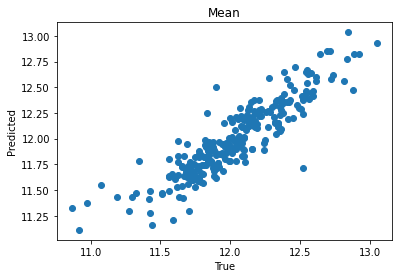

In [ ]:
plt.scatter(y_test, All['Mean']);
plt.title("Mean")
plt.ylabel('Predicted')
plt.xlabel('True')
plt.show();

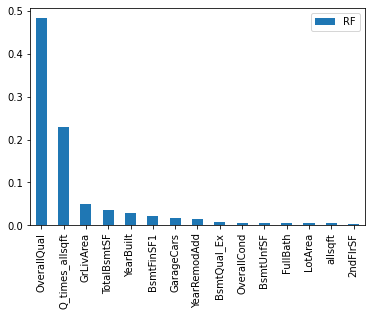

In [ ]:
features = {}
for feature, importance in zip(x_train.columns, rf.feature_importances_):
    features[feature] = importance

importances = pd.DataFrame({"RF":features})
importances.sort_values("RF", ascending = False, inplace=True)
importances[:15].plot.bar();

In [ ]:
"""
param_grid = {'n_estimators': np.arange(100,2000,100),'max_depth': [None], 'max_features':['auto','log2','sqrt']}
rf_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid, cv=4,verbose=10)
rf_grid.fit(x_train, y_train)
print(rf_grid.best_estimator_)
print(rf_grid.best_params_)
rf_score = rf_grid.best_score_
print(rf_score) 
"""

"\nparam_grid = {'n_estimators': np.arange(100,2000,100),'max_depth': [None], 'max_features':['auto','log2','sqrt']}\nrf_grid = GridSearchCV(RandomForestRegressor(n_jobs=-1), param_grid, cv=4,verbose=10)\nrf_grid.fit(x_train, y_train)\nprint(rf_grid.best_estimator_)\nprint(rf_grid.best_params_)\nrf_score = rf_grid.best_score_\nprint(rf_score) \n"

# Clustering

In [ ]:
x_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,allsqft,Q_times_allsqft,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,...,LotFrontage_99.0,LotFrontage_None,LotShape_IR1,LotShape_IR2,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip
0,0.107716,-0.223600,0.650128,-0.540254,1.034655,0.850720,0.498145,0.607108,-0.945544,-0.495865,1.239194,0.476577,1.104096,0.833411,1.246465,0.191578,-0.958432,0.334099,-0.785217,0.261059,-1.607351,0.134794,-0.131138,0.039532,-0.418854,-0.313625,-0.299050,0.725993,-0.15766,-0.421927,-0.343265,1.516068,-0.230315,-0.154524,-0.308212,-0.623379,-0.308212,-0.144749,1.133893,-0.154524,...,-0.043234,-0.471539,-0.718516,-0.178217,0.768443,-0.228061,-0.092014,0.496499,-0.403348,-0.106399,1.445454,-1.177934,-0.302737,-0.119126,-0.101821,-0.199417,-0.148073,2.870780,-0.175412,-0.27032,-0.245634,-0.141354,-0.119126,-0.175412,-0.434131,-0.223497,-0.157660,-0.254063,-0.276234,-0.123091,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
1,-0.853544,-0.070583,-0.100882,2.235235,0.108219,-0.470198,-0.589048,1.240794,-0.641998,0.502638,-0.780326,-0.476680,-0.829876,0.833411,-0.765900,0.191578,0.605402,0.334099,1.671637,-0.744665,-0.481155,-0.621746,-0.131520,-0.177393,-0.418854,3.188521,-0.299050,-1.377424,-0.15766,2.370081,-0.343265,-0.659601,-0.230315,-0.154524,-0.308212,-0.623379,-0.308212,-0.144749,1.133893,-0.154524,...,-0.043234,-0.471539,-0.718516,-0.178217,0.768443,-0.228061,-0.092014,0.496499,-0.403348,-0.106399,-0.691824,0.848944,-0.302737,-0.119126,-0.101821,-0.199417,-0.148073,-0.348337,-0.175412,-0.27032,-0.245634,-0.141354,-0.119126,-0.175412,-0.434131,-0.223497,-0.157660,-0.254063,-0.276234,-0.123091,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,11.532563,-0.097037,0.502331,-0.075023,-0.478913
2,0.107716,0.148962,0.650128,-0.540254,0.966030,0.801797,0.309550,0.094567,-0.302207,-0.338466,1.267572,0.638290,1.104096,0.833411,1.246465,0.191578,0.605402,0.334099,-0.785217,-0.052199,1.020440,0.134794,0.238512,0.401989,-0.418854,-0.313625,3.343923,-1.377424,-0.15766,-0.421927,-0.343265,1.516068,-0.230315,-0.154524,-0.308212,-0.623379,-0.308212,-0.144749,1.133893,-0.154524,...,-0.043234,-0.471539,1.391757,-0.178217,-1.301333,-0.228061,-0.092014,0.496499,-0.403348,-0.106399,1.445454,-1.177934,-0.302737,-0.119126,-0.101821,-0.199417,-0.148073,2.870780,-0.175412,-0.27032,-0.245634,-0.141354,-0.119126,-0.175412,-0.434131,-0.223497,-0.157660,-0.254063,-0.276234,-0.123091,-0.245634,-0.218857,-0.251976,-0.141354,-0.154524,-0.086711,-0.097037,0.502331,-0.075023,-0.478913
3,0.348031,-0.077236,0.650128,-0.540254,-1.984841,-0.763736,-0.589048,-0.534460,-0.062088,-0.741802,1.007446,0.491471,1.104096,-1.035661,-0.765900,0.191578,0.605402,1.711613,-0.785217,-0.167610,-1.607351,-1.378287,-0.043539,0.125426,-0.418854,-0.313625,-0.299050,0.725993,-0.15766,2.370081,-0.343265,-0.659601,-0.230315,-0.154524,-0.308212,-0.623379,-0.308212,-0.144749,-0.881917,-0.154524,...,-0.043234,-0.471539,

In [76]:
clustering_set=train[['GrLivArea','OverallQual']]
clustering_set.head()

,GrLivArea,OverallQual
197,1852,7
585,1411,7
846,2127,7
1195,1616,7
1163,1824,6


In [84]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [116]:
DB = DBSCAN(eps=9, min_samples=10)
DB.fit(clustering_set)
clusters = DB.labels_
x_train['DBSCAN_labels']=DB.labels_


no_clusters = len(np.unique(clusters))
no_noise = np.sum(np.array(clusters) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(clustering_set, clusters))

Estimated no. of clusters: 18
Estimated no. of noise points: 193
Silhouette Coefficient: 0.328


In [79]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(clustering_set)
distances, indices = nbrs.kneighbors(clustering_set)

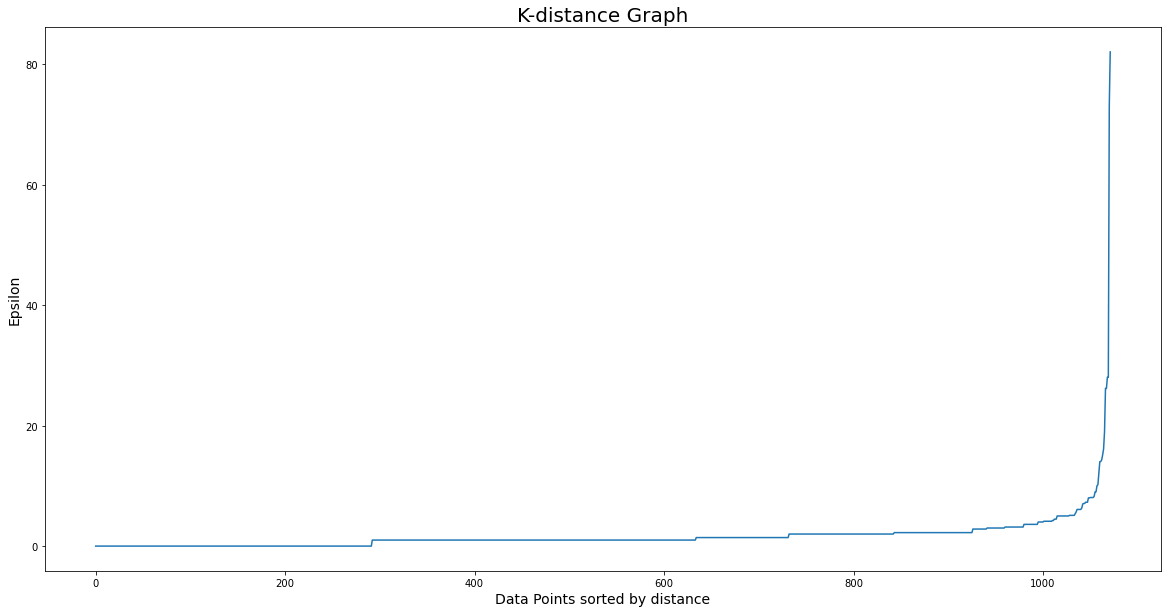

In [80]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

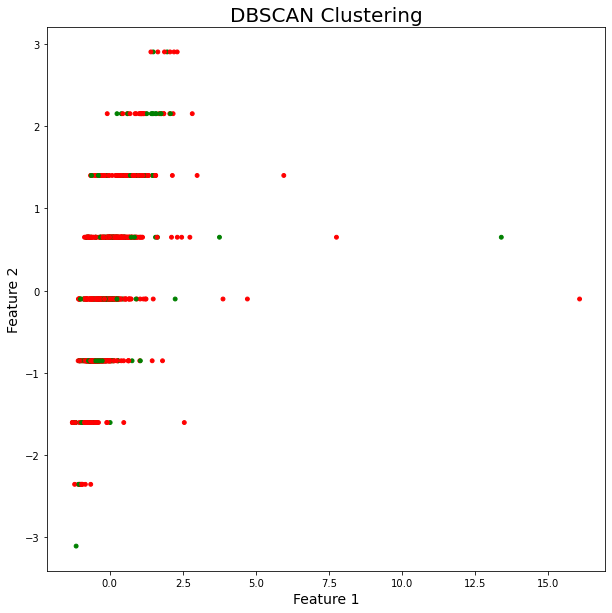

In [117]:
# Plotting resulting clusters
colors=['red','green']
plt.figure(figsize=(10,10))
plt.scatter(x_train['Q_times_allsqft'],x_train['OverallQual'],c=x_train['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='GrLivArea'>

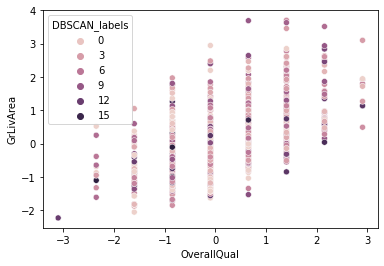

In [123]:
import seaborn as sns
x_train['DBSCAN_labels']=DB.labels_
sns.scatterplot(data=x_train, x="OverallQual", y="GrLivArea", hue="DBSCAN_labels")

<AxesSubplot:xlabel='OverallQual', ylabel='YearBuilt'>

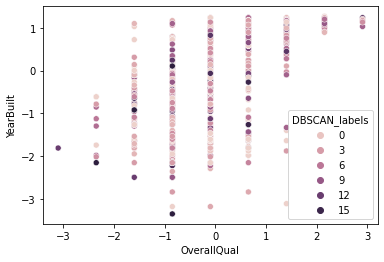

In [122]:
sns.scatterplot(data=x_train, x="OverallQual", y="YearBuilt", hue="DBSCAN_labels")

<AxesSubplot:xlabel='OverallQual', ylabel='OverallCond'>

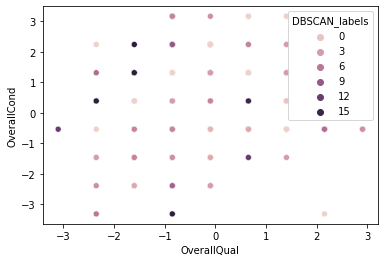

In [124]:
sns.scatterplot(data=x_train, x="OverallQual", y="OverallCond", hue="DBSCAN_labels")

# Classification

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

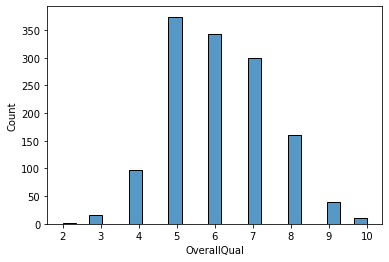

In [19]:
import seaborn as sns
sns.histplot(data=df, x='OverallQual')

Duplicating the Quality category only occuring once, in order to be able to train for it.

In [7]:
add=df.loc[df['OverallQual'] == 2]
#df=df.append(add)
df.reset_index(drop=True, inplace=True)
#df.drop(df.index[1341:1347], inplace = True )
df.loc[df['OverallQual'] == 2]

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip
1019,1101,30,8400,2,5,1920,1950,0,290,0,...,0,0,0,0,0,0,0,1,0,0
1340,1101,30,8400,2,5,1920,1950,0,290,0,...,0,0,0,0,0,0,0,1,0,0


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['OverallQual']):
        train=df.loc[train_index]
        test=df.loc[test_index]

In [9]:
y_train_c=train['OverallQual']
x_train_c=train.drop(['OverallQual','Id', 'Q_times_allsqft'], axis=1)
y_test_c=test['OverallQual']
x_test_c=test.drop(['OverallQual','Id', 'Q_times_allsqft'], axis=1)
print(x_test)
x_train_c.reset_index(drop=True, inplace=True) 
x_test_c.reset_index(drop=True, inplace=True) 
x_train_c=scale(x_train_c)
x_test_c=scale(x_test_c)
x_train_c.reset_index(drop=True, inplace=True) 
x_test_c.reset_index(drop=True, inplace=True) 
print(x_train_c.shape)
print(x_test_c.shape)
#x_train_c=x_train_c.dropna()
#x_train_c
y_train_c.head()

     MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0      1.629475 -0.981655     0.712960    -0.597808   1.145419      1.089619   
1     -0.873817  0.395321     1.477253    -0.597808   1.145419      1.089619   
2      0.127500 -0.163336    -0.051333     0.355838   0.057099     -0.534295   
3     -0.873817  0.960734    -0.051333     1.309484  -0.602490      0.994095   
4     -0.873817 -0.242010    -0.815626    -0.597808  -0.140778     -0.820868   
..          ...       ...          ...          ...        ...           ...   
263   -0.873817 -0.485181     0.712960    -0.597808   1.046481      0.946333   
264    0.127500 -0.402336    -0.051333    -0.597808   0.881584      0.707522   
265   -0.873817  0.642267    -0.051333     0.355838   0.189016      0.134376   
266   -0.873817 -0.044731    -0.815626     0.355838  -0.734407      0.516473   
267   -0.873817 -0.001024    -0.815626     0.355838  -0.239716     -0.964155   

     MasVnrArea  BsmtFinSF1  BsmtUnfSF 

197     7
585     7
846     7
1195    7
1163    6
Name: OverallQual, dtype: int64

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Log Reg

In [30]:
'''
parameters ={"C":[0.01, 0.1,],
             'penalty':['l2', 'none'],
             'solver':['newton-cg','saga']}
#pipe = make_pipeline(StandardScaler(), LogisticRegression())

grid = GridSearchCV(LogisticRegression(), parameters, cv=4, n_jobs=-1)
logreg_c = grid.fit(x_train_c, y_train_c)

print("tuned hyperparameters : ",logreg_c.best_params_)
print("accuracy :",logreg_c.best_score_)

C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


tuned hyperparameters :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.5541044776119403


tuned hyperparameters (without added features)  :  {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.5541044776119403

In [17]:
log_b_c = LogisticRegression(C=0.03, penalty='l2', solver='newton-cg')
log_c=log_b_c.fit(x_train_c, y_train_c)
log_m=confusion_matrix(y_test_c, log_c.predict(x_test_c))
log_c.score(x_test_c, y_test_c)

0.5278810408921933

In [125]:
log_m

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  5, 13,  2,  0,  0,  0,  0],
       [ 0,  3, 52, 19,  1,  0,  0,  0],
       [ 0,  2, 21, 27, 19,  0,  0,  0],
       [ 0,  0,  2, 18, 34,  6,  0,  0],
       [ 0,  0,  1,  1, 13, 15,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

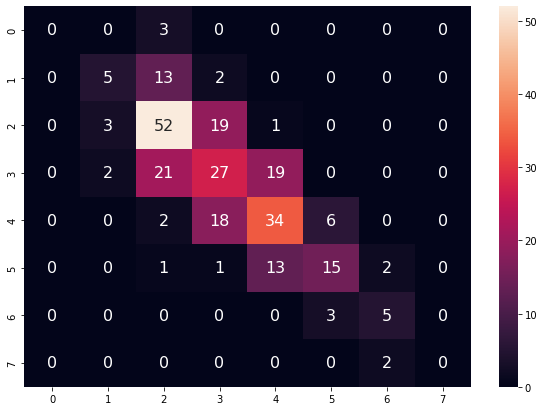

In [34]:
df_cm_log = pd.DataFrame(log_m, range(8), range(8))
plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_log, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Random Forest

In [44]:
parameters = {'criterion': ['gini'],
     'n_estimators': np.arange(400,600,10),
     'max_depth': np.arange(12,16,1),
     'max_features': ['auto'],
     'min_samples_split': [ 4, 5, 6, 7]}

grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv=4, verbose=2, n_jobs=-1)
trees_cv = grid_search.fit(x_train_c, y_train_c)
print("tuned hyperparameters : ",trees_cv.best_params_)
print("accuracy :",trees_cv.best_score_)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


tuned hyperparameters :  {'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 500}
accuracy : 0.6259328358208955


tuned hyperparameters :  {'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 500}
accuracy : 0.6222014925373135

In [31]:
trees_b_c = RandomForestClassifier(criterion='gini', max_depth=13, max_features='auto', min_samples_split=4, n_estimators=500)
trees_c=trees_b_c.fit(x_train_c, y_train_c)
trees_m=confusion_matrix(y_test_c, trees_c.predict(x_test_c))
trees_c.score(x_test_c, y_test_c)

0.5910780669144982

In [49]:
confusion_matrix(y_test_c, trees_c.predict(x_test_c))

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 16,  1,  0,  0,  0,  0],
       [ 0,  0, 63, 11,  1,  0,  0,  0],
       [ 0,  0, 25, 34, 10,  0,  0,  0],
       [ 0,  0,  3, 15, 35,  7,  0,  0],
       [ 0,  0,  1,  3,  9, 17,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

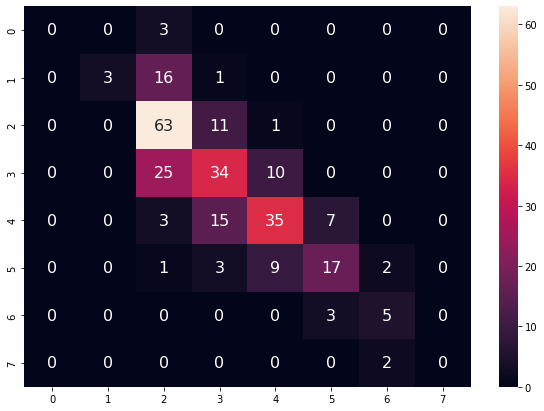

In [50]:
df_cm_trees = pd.DataFrame(trees_m, range(8), range(8))
plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_trees, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [43]:
trees_m

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 16,  1,  0,  0,  0,  0],
       [ 0,  0, 62, 13,  0,  0,  0,  0],
       [ 0,  0, 25, 34, 10,  0,  0,  0],
       [ 0,  0,  4, 13, 36,  7,  0,  0],
       [ 0,  0,  1,  3,  9, 17,  2,  0],
       [ 0,  0,  0,  0,  0,  4,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

Amount of predictions falling within a range of a correct assessment and one category above or below.: 95.54 %

In [60]:
257/269

0.9553903345724907

Extra trees

In [52]:
parameters = {'criterion': ['gini'],
     'n_estimators': np.arange(300,800,10),
     'max_depth': np.arange(11,18,1),
     'max_features': ['auto'],
     'min_samples_split': [ 4, 5, 6, 7, 8]}

grid_search = GridSearchCV(ExtraTreesClassifier(), parameters, cv=4, verbose=2, n_jobs=-1)
Xtrees_cv = grid_search.fit(x_train_c, y_train_c)
print("tuned hyperparameters : ",Xtrees_cv.best_params_)
print("accuracy :",Xtrees_cv.best_score_)

Fitting 4 folds for each of 1750 candidates, totalling 7000 fits


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


tuned hyperparameters :  {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 750}
accuracy : 0.6194029850746268


In [54]:
Xtrees_b_c = ExtraTreesClassifier(criterion='gini', max_depth=14, max_features='auto', min_samples_split=6, n_estimators=750)
Xtrees_c=Xtrees_b_c.fit(x_train_c, y_train_c)
Xtrees_m=confusion_matrix(y_test_c, Xtrees_c.predict(x_test_c))
Xtrees_c.score(x_test_c, y_test_c)

0.5576208178438662

KNN

In [42]:
'''
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN_c = KNeighborsClassifier()
grid_search = GridSearchCV(KNN_c, parameters, cv=4, verbose=2, n_jobs=-1)
knn_cv_c = grid_search.fit(x_train_c, y_train_c)
print("tuned hpyerparameters :(best parameters) ",knn_cv_c.best_params_)
print("accuracy :",knn_cv_c.best_score_)


Fitting 4 folds for each of 80 candidates, totalling 320 fits
[CV] END .................algorithm=auto, n_neighbors=1, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=1; total time=   0.0s


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


[CV] END .................algorithm=auto, n_neighbors=1, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=1, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=1; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=2; total time=   0.0s
[CV] END .................algorithm=auto, n_neighbors=2, p=2; total time=   0.0s
[CV] END .................al

tuned hyperparameters (without added features) : {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1} accuracy : 0.5522388059701492

In [33]:
KNN_b_c = KNeighborsClassifier(algorithm='auto', n_neighbors=20, p=1)
KNN_b=KNN_b_c.fit(x_train_c, y_train_c)
KNN_m=confusion_matrix(y_test_c, KNN_b.predict(x_test_c))
KNN_b.score(x_test_c, y_test_c)

0.516728624535316

In [150]:
KNN_m

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 15,  2,  0,  0,  0,  0],
       [ 0,  2, 64,  8,  1,  0,  0,  0],
       [ 0,  1, 32, 22, 14,  0,  0,  0],
       [ 0,  0,  5, 15, 37,  3,  0,  0],
       [ 0,  0,  2,  2, 18,  9,  1,  0],
       [ 0,  0,  0,  0,  1,  3,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

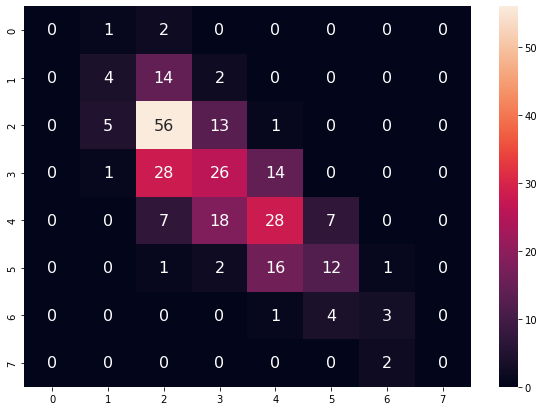

In [52]:
df_cm_knn = pd.DataFrame(KNN_m, range(8), range(8))
plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}) # font size

plt.show()

SVM

In [51]:
parameters = {'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_c = SVC()
grid_search = GridSearchCV(svm_c, parameters, cv=4, verbose=2, n_jobs=-1)
svm_cv_c = grid_search.fit(x_train_c, y_train_c)
print("tuned hpyerparameters :(best parameters) ",svm_cv_c.best_params_)
print("accuracy :",svm_cv_c.best_score_)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}
accuracy : 0.5531716417910448


tuned hyperparameters (without added features) : {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'} accuracy : 0.5475746268656716

In [26]:
svm_b_c = SVC(C=1, gamma=0.01, kernel='rbf', probability=True)
svm_b=svm_b_c.fit(x_train_c, y_train_c)
svm_m=confusion_matrix(y_test_c, svm_b.predict(x_test_c))
svm_b.score(x_test_c, y_test_c)

0.5241635687732342

In [56]:
svm_m

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  5, 13,  2,  0,  0,  0,  0],
       [ 0,  3, 52, 19,  1,  0,  0,  0],
       [ 0,  2, 21, 27, 19,  0,  0,  0],
       [ 0,  0,  2, 18, 34,  6,  0,  0],
       [ 0,  0,  1,  1, 13, 15,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

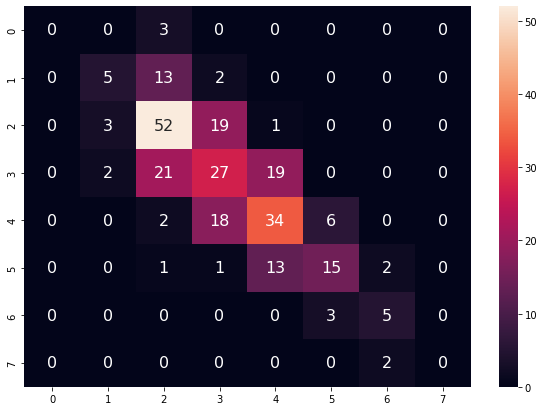

In [58]:
df_cm_svm = pd.DataFrame(svm_m, range(8), range(8))
plt.figure(figsize=(10,7))
#sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {'n_estimators': np.arange(200,800,50),
             'learning_rate': [0.3, 0.5, 0.8, 1.0]}

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME.R")
grid_search = GridSearchCV(ada_clf, parameters, cv=4, verbose=2, n_jobs=-1)
ada = grid_search.fit(x_train_c, y_train_c)
print("tuned hpyerparameters :",ada.best_params_)
print("accuracy :",ada.best_score_)
#y_pred_c =grid_search.predict(x_test_c)
#print(ada_clf.__class__.__name__, accuracy_score(y_test_c, y_pred_c))

Fitting 4 folds for each of 48 candidates, totalling 192 fits


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(


tuned hpyerparameters : {'learning_rate': 0.8, 'n_estimators': 650}
accuracy : 0.5438432835820894


In [75]:
ada_b_c = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME.R", n_estimators=650, learning_rate=0.8)
ada_c=ada_b_c.fit(x_train_c, y_train_c)
ada_m=confusion_matrix(y_test_c, ada_c.predict(x_test_c))
ada_c.score(x_test_c, y_test_c)

0.5390334572490706

In [124]:
confusion_matrix(y_test_c,ada_c.predict(x_test_c))

array([[ 0,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  5, 14,  1,  0,  0,  0,  0],
       [ 0,  3, 51, 20,  1,  0,  0,  0],
       [ 0,  0, 20, 35, 14,  0,  0,  0],
       [ 0,  0,  3, 15, 35,  7,  0,  0],
       [ 0,  0,  1,  3, 13, 14,  1,  0],
       [ 0,  0,  0,  0,  2,  2,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1]], dtype=int64)

In [104]:
!pip install xgboost
from xgboost import XGBClassifier

In [105]:
parameters = {'max_depth': np.arange(5,11,1),
              'early_stopping_rounds': np.arange(3,6,1),
              'min_child_weight': np.arange(3,6,1),
              'alpha' : np.logspace(-3, 3, 5),
               'gamma': np.logspace(-3, 3, 5)}

xg_clf = XGBClassifier(booster='gbtree')
grid_search = GridSearchCV(xg_clf, parameters, cv=4, verbose=2, n_jobs=-1)
xg = grid_search.fit(x_train_c, y_train_c)
print("tuned hpyerparameters :",xg.best_params_)
print("accuracy :",xg.best_score_)

Fitting 4 folds for each of 1350 candidates, totalling 5400 fits


C:\Users\flori\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\flori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:58:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
tuned hpyerparameters : {'alpha': 0.001, 'early_stopping_rounds': 3, 'gamma': 1.0, 'max_depth': 10, 'min_child_weight': 4}
accuracy : 0.5764925373134328


In [118]:
xg_b_c = XGBClassifier(booster='gbtree', alpha=0.001, gamma=1, max_depth=10, min_child_weight=4)
xg_c=xg_b_c.fit(x_train_c, y_train_c)
xg_m=confusion_matrix(y_test_c, xg_c.predict(x_test_c))
xg_c.score(x_test_c, y_test_c)

C:\Users\flori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5724907063197026

In [125]:
confusion_matrix(y_test_c, xg_c.predict(x_test_c))

array([[ 0,  1,  2,  0,  0,  0,  0,  0],
       [ 0,  4, 14,  2,  0,  0,  0,  0],
       [ 0,  1, 58, 15,  1,  0,  0,  0],
       [ 0,  1, 22, 34, 12,  0,  0,  0],
       [ 0,  0,  2, 15, 36,  7,  0,  0],
       [ 0,  0,  1,  3,  8, 18,  2,  0],
       [ 0,  0,  0,  0,  0,  4,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)

Voting Classifier

In [123]:
voting_clf = VotingClassifier(
    estimators=[('rf', trees_c),('Xtrees', Xtrees_c), ('XGB', xg_c)],
    voting='soft')
voting_clf.fit(x_train_c, y_train_c)
y_pred_c =voting_clf.predict(x_test_c)
print(voting_clf.__class__.__name__, accuracy_score(y_test_c, y_pred_c))

C:\Users\flori\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.5687732342007435


In [126]:
confusion_matrix(y_test_c, voting_clf.predict(x_test_c))

array([[ 0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 16,  1,  0,  0,  0,  0],
       [ 0,  1, 59, 15,  0,  0,  0,  0],
       [ 0,  0, 25, 32, 12,  0,  0,  0],
       [ 0,  0,  2, 15, 36,  7,  0,  0],
       [ 0,  0,  1,  2,  9, 18,  2,  0],
       [ 0,  0,  0,  0,  0,  3,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  0]], dtype=int64)